In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
SPOTIFY_CLIENT_ID = '2ec294682f3d4d53a0b933dc486bd294'
SPOTIFY_CLIENT_SECRET = '4c3845c0b99442239e636930b6410122'
# SPOTIFY_REDIRECT_URI = ''
auth_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
sp.me 

<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001945477CD90>>

In [ ]:
track_data = sp.search(q='track:'+'money',type='track', limit=20)
track_result = []
for i, item in enumerate(track_data['tracks']['items']):
    track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, track['artists'][0]['name'], track['name'], track_id, track_name, track['release_date'], popularity))

track_result


In [3]:
import pandas as pd
track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))
track_df



,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity
0,0,Yung Gravy,Betty (Get Money),4cacyP5c3PMlfnyjpg13xW,Betty (Get Money),2022-06-10,88
1,1,Kendrick Lamar,"good kid, m.A.A.d city",2HbKqm4o0w5wEeEFXm2sD4,Money Trees,2012,80
2,2,Yeat,Up 2 Më,7BbaIYAdi3pg4MGl6PHwPv,Monëy so big,2021-09-10,80
3,3,Offset,CODE (feat. Moneybagg Yo),5uVW9FWVaQde0lfF4hYs4C,CODE (feat. Moneybagg Yo),2022-08-26,77
4,4,Lil Uzi Vert,Lil Uzi Vert vs. The World,0B8QzDH7YWih85V5SEMnyJ,Money Longer,2016-05-27,75
5,5,Joji,In Tongues (Deluxe),0baNzeUcPQnQSagpe8T0mD,worldstar money (interlude),2018-02-14,79
6,6,Drake,The Best In The World Pack,5ry2OE6R2zPQFDO85XkgRb,Money In The Grave (Drake ft. Rick Ross),2019-06-15,78
7,7,Lil Tjay,Destined 2 Win,1dg3qy5DjoJodawfOCgrTP,Run It Up (feat. Offset & Moneybagg Yo),2021-04-02,79
8,8,Trippie Redd,Big 14 (feat. Offset & Moneybagg Yo),7rQ84WsT2Wcnrz5gTmbGmw,Big 14 (feat. Offset & Moneybagg Yo),2022-08-05,74
9,9,LISA,LALISA,7hU3IHwjX150XLoTVmjD0q,MONEY,2021-09-10,80


In [6]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

final_df = track_df.merge(features_df, left_on="Id", right_on="id")
final_df_sorted = final_df.sort_values(by=['Popularity'], ascending=False)


In [ ]:
feature_name = "liveness"
df_plot = final_df_sorted[['Artist', 'Album Name', 'Song Name', 'Release Date', 'Popularity', f'{feature_name}']]
df_plot

No handles with labels found to put in legend.


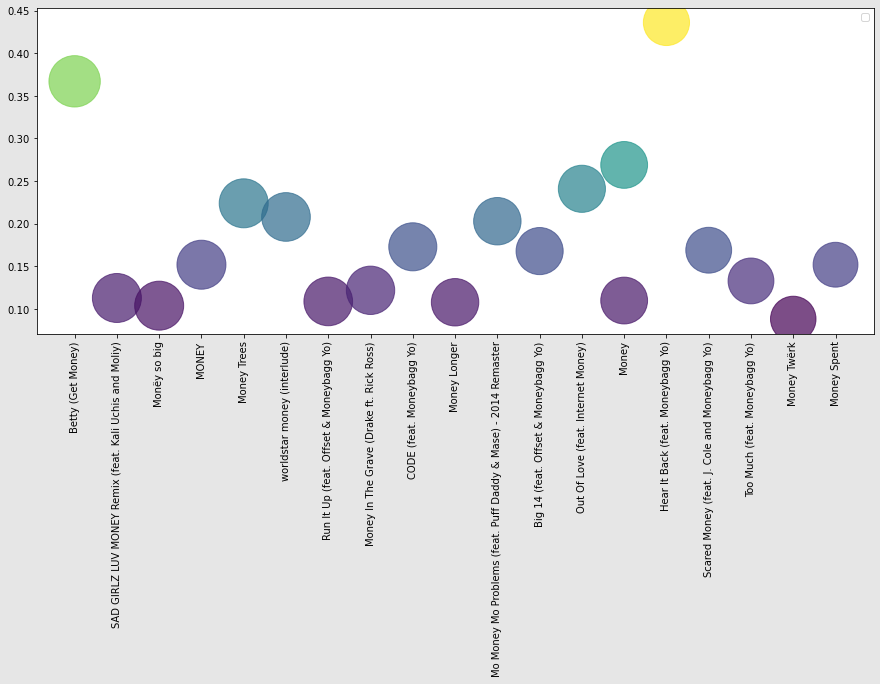

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))
    
x = df_plot['Song Name']
y = df_plot[feature_name]
s = df_plot['Popularity']*30
    
# color_labels = reco_df['explicit'].unique()
# rgb_values = sns.color_palette("Set1", 8)
# color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=df_plot[feature_name])
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()